# **Final Project Task 1 - Census Data Preprocess**

Requirements

- Target variable specification:
    - The target variable for this project is hours-per-week. 
    - Ensure all preprocessing steps are designed to support regression analysis on this target variable.
- Encode data  **3p**
- Handle missing values if any **1p**
- Correct errors, inconsistencies, remove duplicates if any **1p**
- Outlier detection and treatment if any **1p**
- Normalization / Standardization if necesarry **1p**
- Feature engineering **3p**
- Train test split, save it.
- Others?


Deliverable:

- Notebook code with no errors.
- Preprocessed data as csv.

In [67]:
import pandas as pd

In [68]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##### Verificare structura date

In [69]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  str  
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  str  
 4   education-num   32561 non-null  int64
 5   marital-status  32561 non-null  str  
 6   occupation      32561 non-null  str  
 7   relationship    32561 non-null  str  
 8   race            32561 non-null  str  
 9   sex             32561 non-null  str  
 10  capital-gain    32561 non-null  int64
 11  capital-loss    32561 non-null  int64
 12  hours-per-week  32561 non-null  int64
 13  native-country  32561 non-null  str  
 14  income          32561 non-null  str  
dtypes: int64(6), str(9)
memory usage: 3.7 MB


In [70]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


##### Valori lipsa

In [71]:
# Verificam valorile lipsa pe coloana

data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Aceasta metoda nu prezinta valori lipsa, dar continuam cu o verificare pe coloana

In [72]:
# Verificam valorile unice pentru coloana workclass

print(data['workclass'].unique())

<StringArray>
[       'State-gov', 'Self-emp-not-inc',          'Private',
      'Federal-gov',        'Local-gov',                '?',
     'Self-emp-inc',      'Without-pay',     'Never-worked']
Length: 9, dtype: str


Putem observa ca exista valori necunoscute, reprezentate prin "?", nu prin valori lipsa propriu-zise

In [73]:
# Verificam valorile unice pentru coloana workclass

print(data['workclass'].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


Valorile "?" sunt foarte frecvente (1836), asa ca nu le putem elimina

In [74]:
# Verificam ce alte variabile au valori lipsa

print((data == '?').sum()[(data == '?').sum() > 0])

workclass         1836
occupation        1843
native-country     583
dtype: int64


In [75]:
# Inlocuim valorile lipsa cu modul (deoarece nu avem cum sa facem media sau sa ordonam datele pentru a afla mediana) pentru coloanele categorice

cat_features = ["workclass", "occupation", "native-country"]

for col in cat_features:
    mode_value = data[col].mode()[0]
    data[col] = data[col].replace('?', mode_value)

##### Duplicate

In [76]:
# Verificam numarul duplicatelor

print(f"Duplicate înainte: {data.duplicated().sum()}")

Duplicate înainte: 24


In [77]:
# Eliminam duplicatele

data = data.drop_duplicates()
print(data.shape)

(32537, 15)


In [78]:
# Initial, erau erau 32561 de inregistrari, iar dupa eliminarea duplicatelor au ramas 32537 randuri

##### Outliers

In [79]:
# Verificam valorile unice pentru capital-gain si capital-loss

print(data['capital-gain'].unique())
print(data['capital-loss'].unique())

[ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
   914   401  2829  2977  4934  2062  2354  5455 15020  1424  3273 22040
  4416  3908 10566   991  4931  1086  7430  6497   114  7896  2346  3418
  3432  2907  1151  2414  2290 15831 41310  4508  2538  3456  6418  1848
  3887  5721  9562  1455  2036  1831 11678  2936  2993  7443  6360  1797
  1173  4687  6723  2009  6097  2653  1639 18481  7978  2387  5060]
[   0 2042 1408 1902 1573 1887 1719 1762 1564 2179 1816 1980 1977 1876
 1340 2206 1741 1485 2339 2415 1380 1721 2051 2377 1669 2352 1672  653
 2392 1504 2001 1590 1651 1628 1848 1740 2002 1579 2258 1602  419 2547
 2174 2205 1726 2444 1138 2238  625  213 1539  880 1668 1092 1

Am vrut sa verific structura acestor date deoarece din preview-ul de mai sus, nu puteam observa daca exista si alte valori

In [80]:
# Statistici descriptive pentru coloanele de capital
print("--- Statistici Capital ---")
print(data[['capital-gain', 'capital-loss']].describe())

# Calculăm procentul de valori zero
gain_zeros = (data['capital-gain'] == 0).sum() / len(data) * 100
loss_zeros = (data['capital-loss'] == 0).sum() / len(data) * 100

print(f"\nProcent de valori 0 în capital-gain: {gain_zeros:.2f}%")
print(f"Procent de valori 0 în capital-loss: {loss_zeros:.2f}%")

--- Statistici Capital ---
       capital-gain  capital-loss
count  32537.000000  32537.000000
mean    1078.443741     87.368227
std     7387.957424    403.101833
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        0.000000      0.000000
max    99999.000000   4356.000000

Procent de valori 0 în capital-gain: 91.66%
Procent de valori 0 în capital-loss: 95.33%


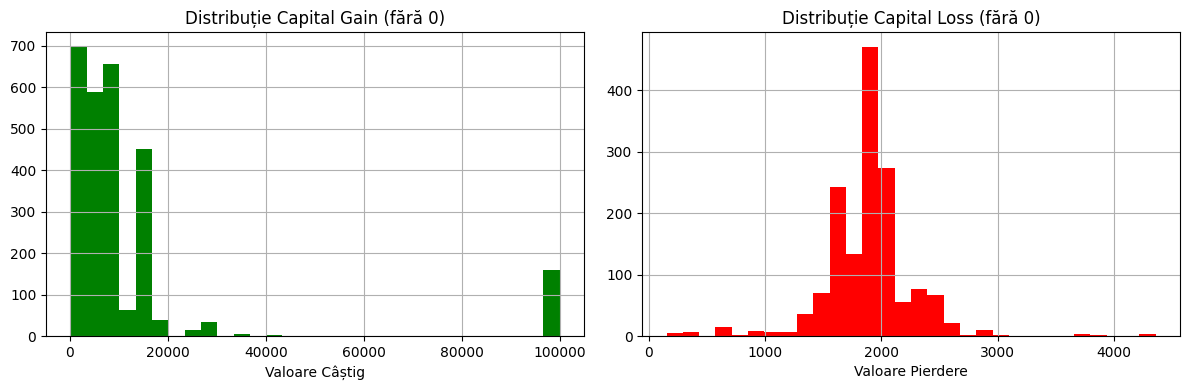

In [81]:
# Pentru a vedea distributia valorilor diferite de 0, cream două histograme separate pentru capital-gain și capital-loss

import matplotlib.pyplot as plt

# Crearea celor două grafice unul langa altul
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Histograma pentru capital-gain (doar valorile > 0)
data[data['capital-gain'] > 0]['capital-gain'].hist(bins=30, ax=ax1, color='green')
ax1.set_title('Distribuție Capital Gain (fără 0)')
ax1.set_xlabel('Valoare Câștig')

# Histograma pentru capital-loss (doar valorile > 0)
data[data['capital-loss'] > 0]['capital-loss'].hist(bins=30, ax=ax2, color='red')
ax2.set_title('Distribuție Capital Loss (fără 0)')
ax2.set_xlabel('Valoare Pierdere')

plt.tight_layout()
plt.show()

Avand in vedere ca peste 91% dintre date, in ambele cazuri, au valoarea 0, iar graficele prezinta o varietate de sume, daca eliminam outlier-ii in cazul acestor variabile, media si quartilele erau foarte puternic afectate, iar mult prea multe valori puteau fi considerate erori

Coloana "Age"

In [82]:
# Calculam limitele IQR pentru coloana 'age'

Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Limite IQR pentru age: [{lower_bound}, {upper_bound}]")

Limite IQR pentru age: [-2.0, 78.0]


In [83]:
# Aplicam clipping pentru a inlocui valorile outlier cu limitele IQR

data['age'] = data['age'].clip(lower=lower_bound, upper=upper_bound)

Am ales aceasta metoda pentru a reduce impactul valorilor extreme asupra modelului de regresie

La nivelul coloanei "education-num" nu vom interveni deoarece valorile sunt integrate intr-un interval fix ce nu prezinta pericol de outliers

##### Feature engineering si encoding

In [84]:
# In cazul acestui proiect, vom declara variabila "hours-per-week" ca target

target = 'hours-per-week'

Cream noi variabile pentru analiza

In [85]:
# Age groups

bins = [0, 25, 45, 65, 100]
labels = ['Young', 'Adult', 'Middle-Aged', 'Senior']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

In [86]:
# Verificam valorile unice pentru coloana 'workclass'

print(data['workclass'].value_counts())

workclass
Private             24509
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


In [87]:
# Gruparea dupa locul de munca

def group_workclass(val):
    if 'gov' in val.lower(): return 'Government'
    if 'self-emp' in val.lower(): return 'Self-Employed'
    if val in ['Private']: return 'Private'
    return 'Other'
data['workclass_group'] = data['workclass'].apply(group_workclass)

In [88]:
# Vericam valorile unice pentru coloana 'marital-status'

print(data['marital-status'].unique())

<StringArray>
[        'Never-married',    'Married-civ-spouse',              'Divorced',
 'Married-spouse-absent',             'Separated',     'Married-AF-spouse',
               'Widowed']
Length: 7, dtype: str


In [89]:
# Status marital

data['is_married'] = data['marital-status'].apply(lambda x: 1 if 'Married' in x else 0)

Am ales sa folosesc statusul marital deoarece include intr-o oarecare masura si datele din variabila relationship, iar in cazul orelor lucrate pe saptamana, presupunem ca prezenta unui partener afecteaza valoarea finala

In [90]:
# Verificam valorile unice pentru coloana 'race'

print(data['race'].value_counts())

race
White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64


In [91]:
# Construim o variabila pentru race

def group_race(race):
    if race in ['White', 'Black']:
        return race
    else:
        return 'Other'
data['race'] = data['race'].apply(group_race)

Deoarece avem doar doua categorii individuale predominante, iar celelalte reprezinta deja o grupare, am decis ca cele individuale sa ramana separate, iar cele grupate sa fie si ele mai apoi impreunate

In [92]:
# Construim o variabila binara pentru sex

data['sex'] = data['sex'].map({'Male': 1, 'Female': 0})

In [93]:
# Capital Net

data['capital_net'] = data['capital-gain'] - data['capital-loss']

Am creat aceasta variabila noua pentru a putea aprecia succesul financiar al unui individ, dar si pentru a combina doua coloane cu informatii putine, in una care sa le combine, reducand astfel si complexitatea modelului

In [94]:
# Vericam valorile unice pentru coloana 'native-country'

print(data['native-country'].value_counts())

native-country
United-States                 29735
Mexico                          639
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        62
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

Avand in vedere ponderea mare de raspunsuri pentru USA, vom introduce in analiza o variabila care sa precizeze daca persoana este din USA sau nu, pentru a evita tarile cu putine intrari, unde probabil sunt alte particularitati

In [95]:
# USA vs Non-USA

data['is_usa'] = data['native-country'].apply(lambda x: 1 if x == 'United-States' else 0)

Avand in vedere varietatea de varste, am ales sa le impart in 4 label-uri reprezentative

In [96]:
# Construim o variabila binara pentru venit

data['income'] = data['income'].map({'>50K': 1, '<=50K': 0})

In [97]:
# Eliminare coloane care nu mai sunt necesare

cols_to_drop = ['fnlwgt', 'education', 'marital-status', 'capital-gain', 'capital-loss', 'native-country', 'age']

cols_to_drop = ['age', 'workclass', 'fnlwgt', 'education', 'marital-status', 'capital-gain', 'capital-loss', 'native-country']
data_reduced = data.drop(columns=cols_to_drop)
print(data_reduced.head())

   education-num         occupation   relationship   race  sex  \
0             13       Adm-clerical  Not-in-family  White    1   
1             13    Exec-managerial        Husband  White    1   
2              9  Handlers-cleaners  Not-in-family  White    1   
3              7  Handlers-cleaners        Husband  Black    1   
4             13     Prof-specialty           Wife  Black    0   

   hours-per-week  income    age_group workclass_group  is_married  \
0              40       0        Adult      Government           0   
1              13       0  Middle-Aged   Self-Employed           1   
2              40       0        Adult         Private           0   
3              40       0  Middle-Aged         Private           1   
4              40       0        Adult         Private           1   

   capital_net  is_usa  
0         2174       1  
1            0       1  
2            0       1  
3            0       1  
4            0       0  


In [98]:
# Transformam coloanele text ramase in coloane numerice

data_final = pd.get_dummies(data_reduced, drop_first=True)

print(data_final.shape[1])

33


##### Target si Train-Test Split

In [99]:
from sklearn.model_selection import train_test_split

# Delimitare date

X = data_final.drop('hours-per-week', axis=1)
y = data_final['hours-per-week']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Normalizare si standardizare

In [100]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [101]:
# Identificăm coloanele numerice care trebuie scalate

cols_to_scale = ['education-num', 'capital_net']

In [102]:
# Fit & Transform pe Train

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

Am folosit fit_transform doar pe datele de antrenament pentru a evita viitoare data leakage

In [103]:
# Transformare doar pe Test (pentru a folosi aceleași limite ca la antrenare)

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [104]:
# Verificam daca coloana 'hours-per-week' a fost eliminata din X_train

print("hours-per-week" in X_train.columns) # Trebuie sa returneze False

False


Am standardizat datele deoarece aveam variabile cu valori complet diferite: capital_net avea valori extrem de mari, in timp ce, education-num sau valorile binare au valori comparativ foarte mici. Daca nu foloseam o metoda de scalare, modelul putea interpreta eronat cifrele si oferea ponderi mai mari unde nu ar fi cazul

Am transformat datele prin standardizare si nu prin normalizare, deoarece am considerat ca aceasta metoda mai robusta nu schimba distributia datelor in prezenta outlierilor care au ramas dupa clipping

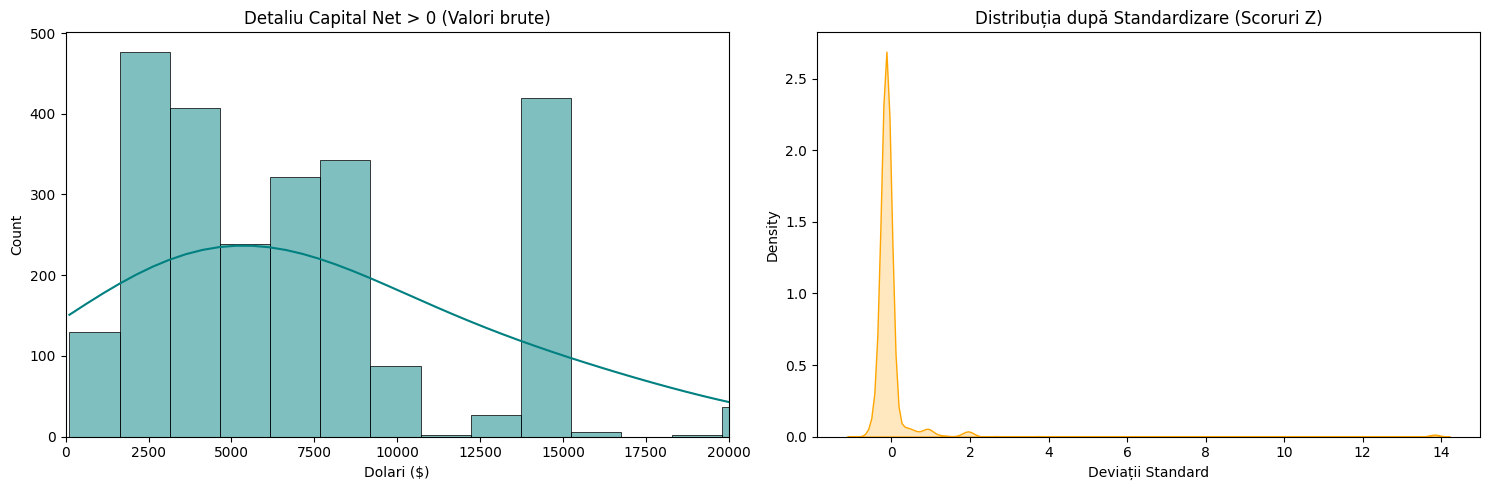

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Graficul 1: Distribuția reală (cu limitare pentru vizibilitate)
sns.histplot(data[data['capital_net'] > 0]['capital_net'], kde=True, ax=ax1, color='teal')
ax1.set_xlim(0, 20000) # Limităm la 20k pentru a vedea grosul datelor
ax1.set_title('Detaliu Capital Net > 0 (Valori brute)')
ax1.set_xlabel('Dolari ($)')

# Graficul 2: După Standardizare (pe setul X_train)
sns.kdeplot(X_train['capital_net'], fill=True, ax=ax2, color='orange')
ax2.set_title('Distribuția după Standardizare (Scoruri Z)')
ax2.set_xlabel('Deviații Standard')

plt.tight_layout()
plt.show()

Din aceste grafice putem observa o distributie asimetrica spre dreapta si faptul ca variabila capital_net este puternic afectata de valorile 0. Inainte de scalare, unitatile erau exprimate in dolari, ceea ce creea dificultati modelului. Dupa aplicarea standardizarii, datele sunt centrate in jurul mediei, iar valorile extreme sunt si ele mai comparabile acum

##### Salvare

In [110]:
# Salvare set complet

import os

data_final.to_csv(os.path.join('data','census_preprocessed_final.csv'), index=False)

In [111]:
# Salvarea seturilor de train/test pentru modele

X_train.to_csv(os.path.join('data','X_train.csv'), index=False)
X_test.to_csv(os.path.join('data','X_test.csv'), index=False)
y_train.to_csv(os.path.join('data','y_train.csv'), index=False)
y_test.to_csv(os.path.join('data','y_test.csv'), index=False)